# Proyek Predictive Analytics Menggunakan Machine Learning Klasifikasi

## 1. Import Library

In [56]:
# Import modules
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import time

# Import objects
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier

# Import functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

Insight:
- Melakukan import library yang digunakan untuk mengerjakan proyek ini.
---

## 2. Data Loading

In [57]:
# Membaca machine_downtime.csv ke dalam DataFrame: df
df = pd.read_csv("machine_downtime.csv")

# Menampilkan lima data teratas DataFrame
df.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [58]:
# Menampilkan informasi DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         2500 non-null   object 
 1   Machine_ID                   2500 non-null   object 
 2   Assembly_Line_No             2500 non-null   object 
 3   Hydraulic_Pressure(bar)      2490 non-null   float64
 4   Coolant_Pressure(bar)        2481 non-null   float64
 5   Air_System_Pressure(bar)     2483 non-null   float64
 6   Coolant_Temperature          2488 non-null   float64
 7   Hydraulic_Oil_Temperature    2484 non-null   float64
 8   Spindle_Bearing_Temperature  2493 non-null   float64
 9   Spindle_Vibration            2489 non-null   float64
 10  Tool_Vibration               2489 non-null   float64
 11  Spindle_Speed(RPM)           2494 non-null   float64
 12  Voltage(volts)               2494 non-null   float64
 13  Torque(Nm)        

Insight:
- Berdasarkan informasi DataFrame, jumlah data yang dimiliki sebesar 2500 data yang terdiri fitur dan label. 

- Label terdapat dalan kolom ```Downtime```, sedangkan fitur terdapat dalam 15 kolom lainnya yang mana pemilihan kolom menjadi fitur akan dieksplor lebih lanjut pada Exploratory Data Analysis.
---

## 3. Exploratory Data Analysis - Univariate

### 3.1 Distribusi Data Fitur Kategorik

C:\Users\Mahen\AppData\Local\Temp\ipykernel_24324\2202046998.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette="viridis")
C:\Users\Mahen\AppData\Local\Temp\ipykernel_24324\2202046998.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], palette="viridis")


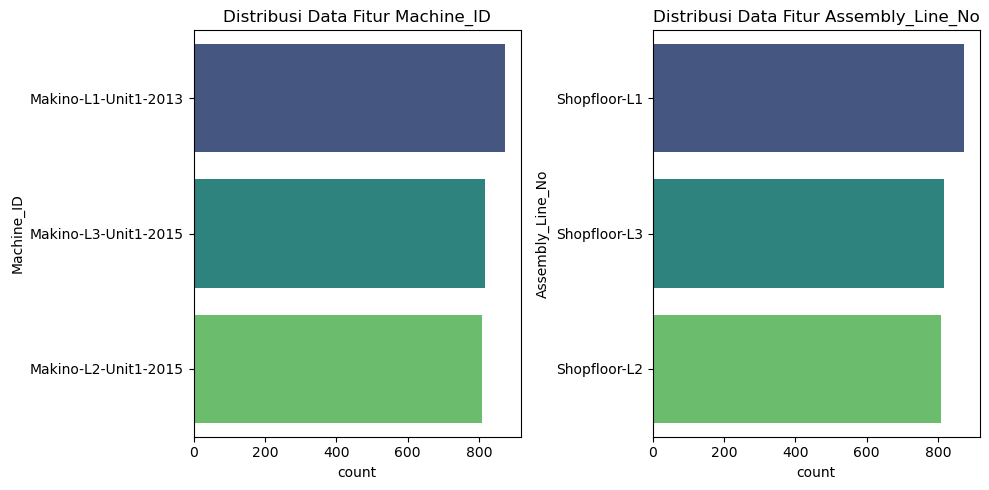

In [59]:
# Membuat list fitur kategorik: categorical_feat
categorical_feat = df.select_dtypes(include="object").columns.drop(
    labels=["Downtime", "Date"]
)

# Menampilkan distribusi data fitur kategorik
plt.figure(figsize=(10, 5))
for i, col in enumerate(categorical_feat, start=1):
    plt.subplot(1, 2, i)
    sns.countplot(y=df[col], palette="viridis")
    plt.title(f"Distribusi Data Fitur {col}")
plt.tight_layout()
plt.show()

In [60]:
# Menghapus fitur Assembly_Line_No
df.drop(columns="Assembly_Line_No", inplace=True)

# Memperbarui fitur kategorik
categorical_feat = df.select_dtypes(include="object").columns.drop(labels="Downtime")

# Menampilkan informasi DataFrame setelah menghapus fiture Assembly_Line_No
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         2500 non-null   object 
 1   Machine_ID                   2500 non-null   object 
 2   Hydraulic_Pressure(bar)      2490 non-null   float64
 3   Coolant_Pressure(bar)        2481 non-null   float64
 4   Air_System_Pressure(bar)     2483 non-null   float64
 5   Coolant_Temperature          2488 non-null   float64
 6   Hydraulic_Oil_Temperature    2484 non-null   float64
 7   Spindle_Bearing_Temperature  2493 non-null   float64
 8   Spindle_Vibration            2489 non-null   float64
 9   Tool_Vibration               2489 non-null   float64
 10  Spindle_Speed(RPM)           2494 non-null   float64
 11  Voltage(volts)               2494 non-null   float64
 12  Torque(Nm)                   2479 non-null   float64
 13  Cutting(kN)       

Insight:
- Berdasarkan distribusi data fitur kategorik, menunjukkan bahwa distribusi data fitur kategorik ```Machine_ID``` dan ```Assembly_Line_No``` memiliki jumlah data seimbang pada masing-masing kategorinya dan tidak bias ke salah satu kategorinya.

- Selain itu, terkait penomoran identifikasi pada fitur ```Assembly_Line_No``` dapat diwakilkan nilai kategorinya oleh fitur ```Machine_ID``` karena dalam penomoran idenifikasi pada fitur ```Machine_ID``` sudah termasuk nomor identifikasi yang ada pada fitur ```Assembly_Line_No```, yaitu nomor line. Oleh karena itu, jumlah fitur kategorik yang digunakan dalam pemodelan proyek machine learning ini menjadi satu fitur.
---

### 3.2 Distribusi Data Fitur Numerik

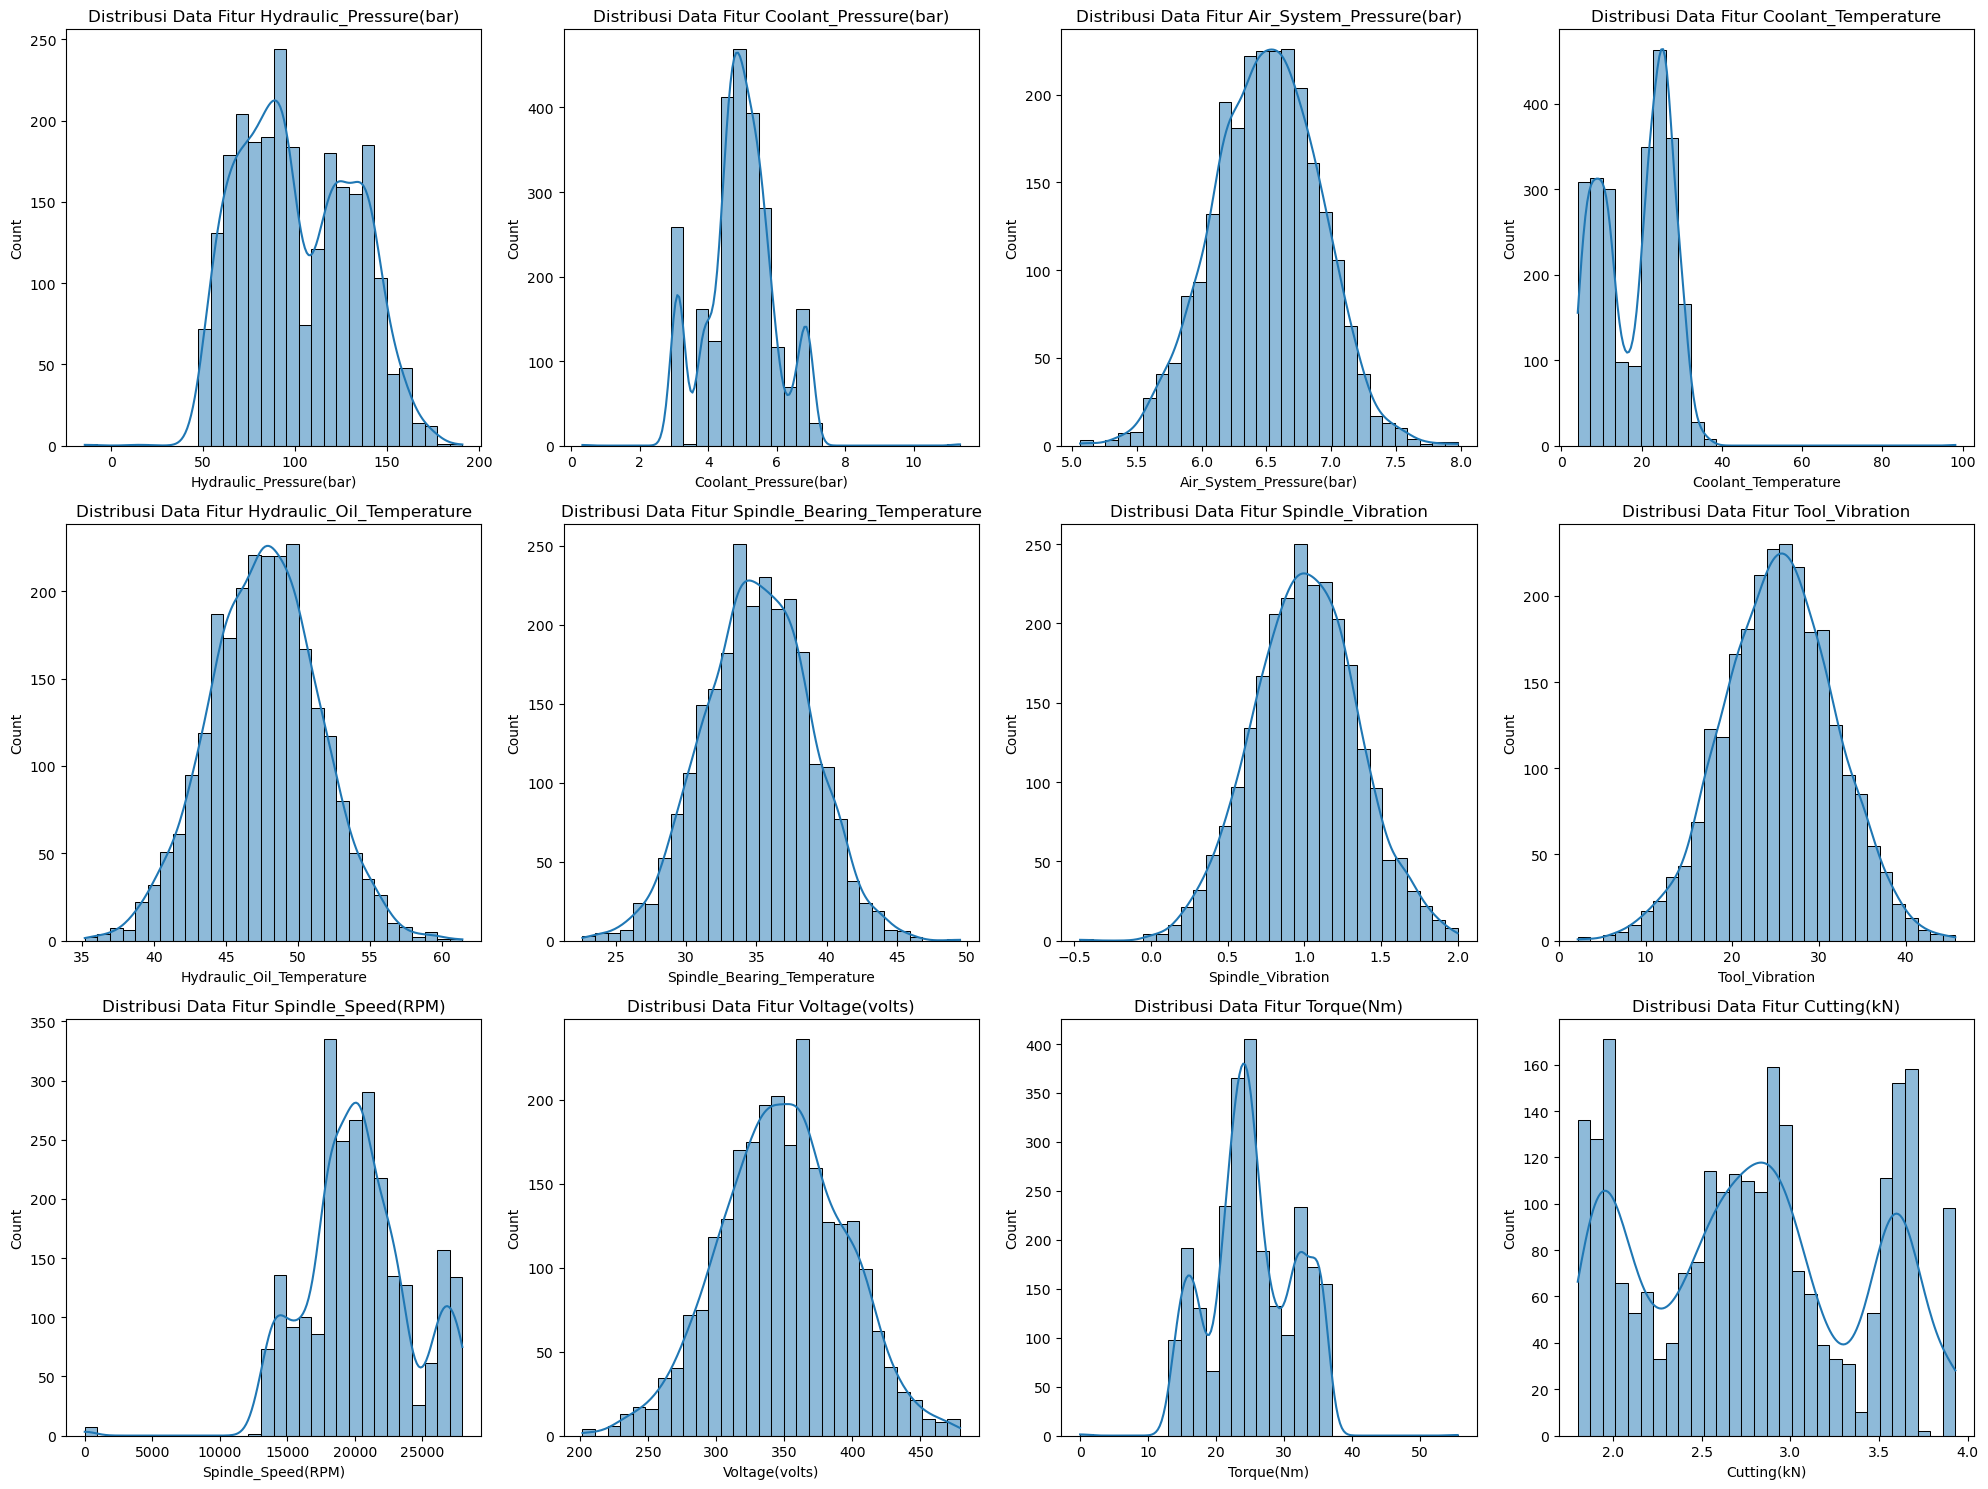

In [61]:
# Membuat list fitur numerik: numerical_feat
numerical_feat = df.select_dtypes(include="number").columns

# Menampilkan distribusi data fitur numerik
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_feat, start=1):
    plt.subplot(3, 4, i)
    sns.histplot(data=df[col], bins=30, kde=True)
    plt.title(f"Distribusi Data Fitur {col}")
plt.tight_layout()
plt.show()

Insight:
- Berdasarkan distribusi data fitur numerik, menunjukkan bahwa distribusi data fitur ```Coolant_Temperature``` dan fitur ```Spindle_Speed(RPM)``` adalah distribusi data memiliki kecenderungan miring. Hal ini membuat kedua distribusi data fitur numerik tersebut tidak terdistribusi normal.
---  

### 3.3 Distribusi Data Label

C:\Users\Mahen\AppData\Local\Temp\ipykernel_24324\264045096.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df["Downtime"], palette="viridis")


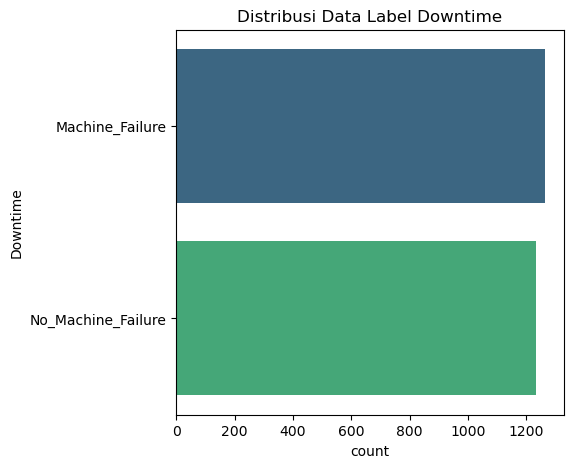

In [62]:
# Menampilkan distribusi data label
plt.figure(figsize=(5, 5))
sns.countplot(data=df["Downtime"], palette="viridis")
plt.title("Distribusi Data Label Downtime")
plt.show()

Insight:
- Berdasarkan distribusi data label, menunjukkan bahwa distribusi data label pada setiap label memiliki jumlah data yang seimbang, sehingga tidak ada label yang lebih dominan dari label lainnya. 
---

## 4. Exploratory Data Analysis - Multivariate

### 4.1 Korelasi Fitur Kategorik dengan Label

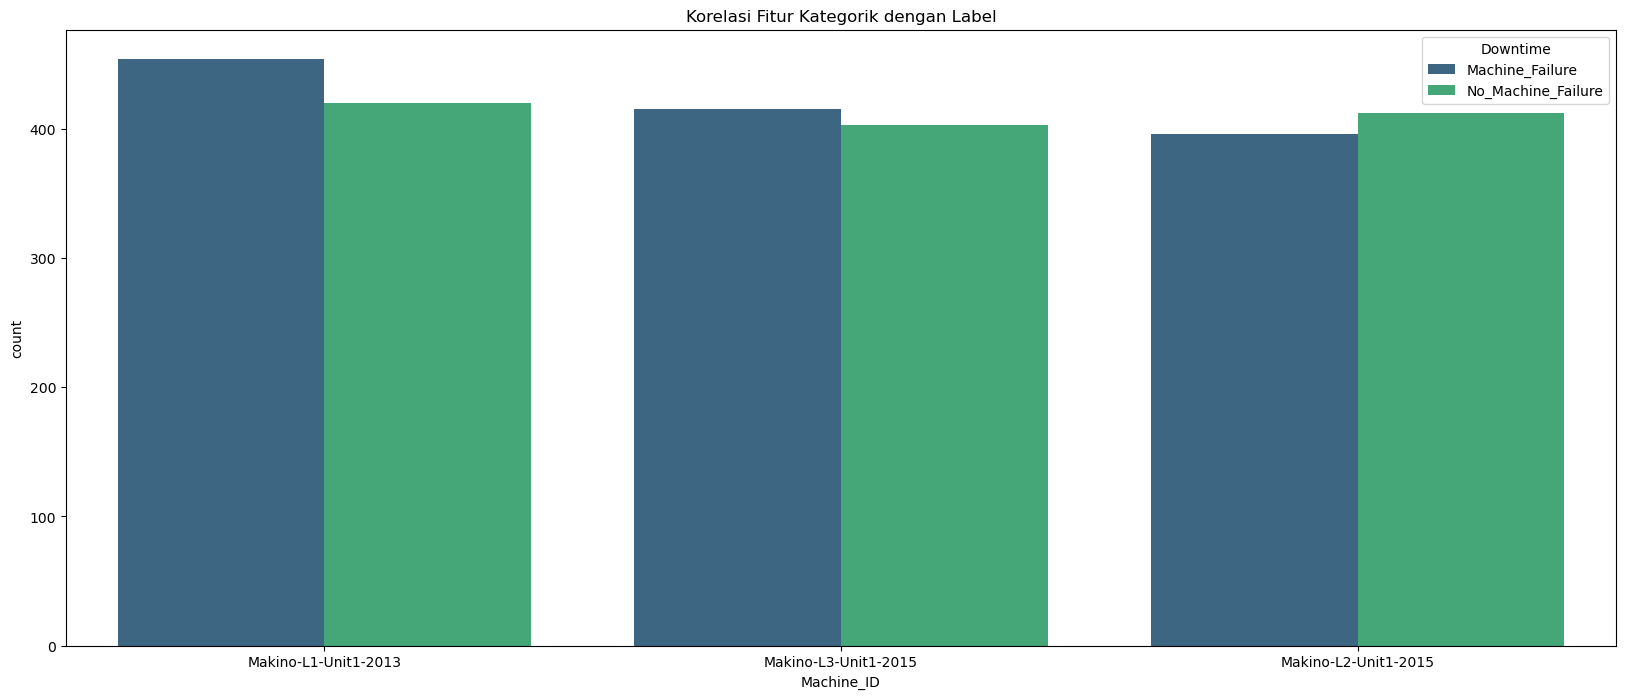

In [63]:
# Menampilkan korelasi fitur kategorik dengan label
plt.figure(figsize=(20, 8))
sns.countplot(data=df, x=df["Machine_ID"], hue=df["Downtime"], palette="viridis")
plt.title("Korelasi Fitur Kategorik dengan Label")
plt.show()

Insight:
- Berdasarkan korelasi fitur kategorik dengan label, menunjukkan bahwa sebaran data label pada masing-masing data fitur kategorik adalah seimbang, sehingga data tidak bias ke salah satu kategori fitur yang mana berpotensi hasil pemodelan machine learning dapat menggeneralisasi penggunaannya untuk semua mesin dengan nama brand yang sama.

- Korelasi fitur kategorik dengan label dilakukan karena tipe data dari label sendiri berupa tipe data kategorik, sehingga korelasi fitur dengan label dilakukan menyesuaikan tipe data dari labelnya.
---

### 4.2 Korelasi Fitur Numerik

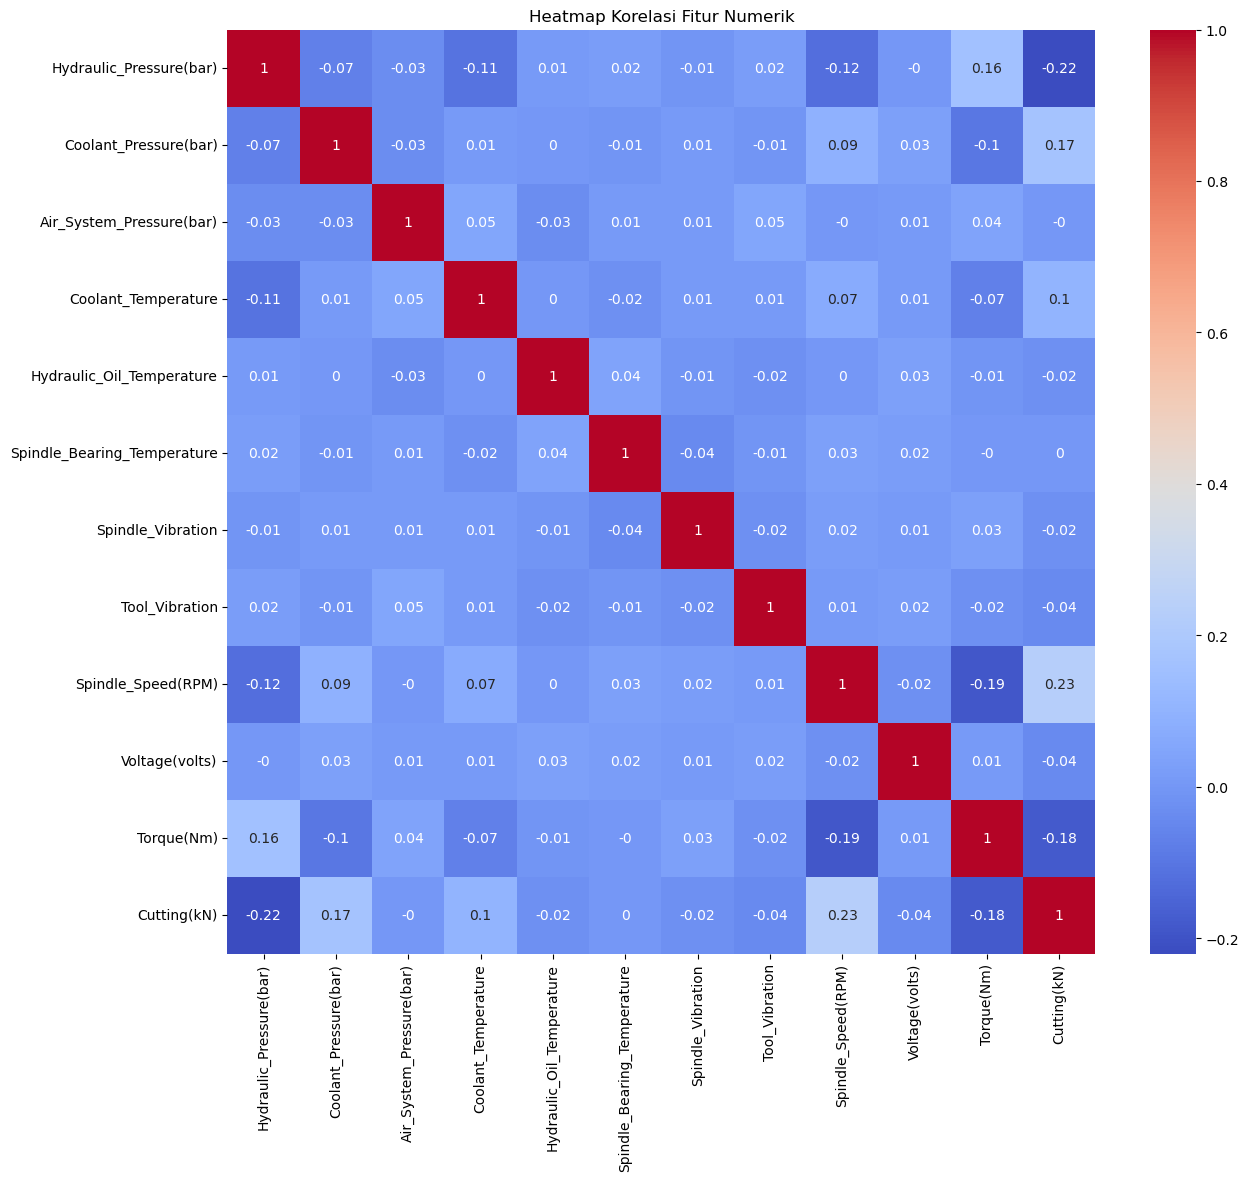

In [64]:
# Membuat correlation matrix fitur numerik: corr_matrix
corr_matrix = df[numerical_feat].corr().round(2)

# Menampilkan heatmap korelasi fitur numerik
plt.figure(figsize=(14, 12))
sns.heatmap(data=corr_matrix, annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Fitur Numerik")
plt.show()

Insight:
- Berdasarkan korelasi fitur numerik, menunjukkan bahwa korelasi antara kedua fitur numerik tidak ada yang memiliki korelasi kuat maupun bertentangan. Hal ini menunjukkan semua fitur numerik berkontribusi secara independen atau tidak bergantung satu sama lain.
---

## 5. Data Preparation

### 5.1 Menangani Missing Value

In [65]:
# Membuat list kolom yang memiliki missing value: missing_values
missing_values = df.isnull().sum()

# Menampilkan jumlah missing value setiap kolom DataFrame
print("Jumlah Missing Value Setiap Kolom DataFrame:")
print(missing_values[missing_values > 0])

Jumlah Missing Value Setiap Kolom DataFrame:
Hydraulic_Pressure(bar)        10
Coolant_Pressure(bar)          19
Air_System_Pressure(bar)       17
Coolant_Temperature            12
Hydraulic_Oil_Temperature      16
Spindle_Bearing_Temperature     7
Spindle_Vibration              11
Tool_Vibration                 11
Spindle_Speed(RPM)              6
Voltage(volts)                  6
Torque(Nm)                     21
Cutting(kN)                     7
dtype: int64


In [66]:
# Membuat list kolom numerik DataFrame: numerical_cols
numerical_cols = df.select_dtypes(include="number").columns

# Mengisi missing value dengan nilai median
df[numerical_cols] = df[numerical_cols].fillna(value=df[numerical_cols].median())

# Menampilkan jumlah missing value setelah mengisi missing value
missing_values = df.isnull().sum()
print("Jumlah Missing Value Setelah Mengisi Missing Value:")
print(missing_values[missing_values > 0])

Jumlah Missing Value Setelah Mengisi Missing Value:
Series([], dtype: int64)


Insight:
- Berdasarkan identifikasi missing value pada setiap kolom DataFrame, menunjukkan kolom yang memiliki missing value merupakan kolom numerik.

- Oleh karena itu, dilakukan mengisi missing value dengan nilai median masing-masing kolom yang memiliki missing value.
---

### 5.2 Menangani Duplikasi Data 

In [67]:
# Menampilkan jumlah data duplikat dalam DataFrame
print("Jumlah Data Duplikat dalam DataFrame:", df.duplicated().sum())

Jumlah Data Duplikat dalam DataFrame: 0


Insight:
- Berdasarkan identifikasi data duplikat dalam DataFrame, menunjukkan tidak ada data duplikat dalam DataFrame, maka tidak memerlukan penanganan duplikasi data pada DataFrame.
---

### 5.3 Menangani Outliers

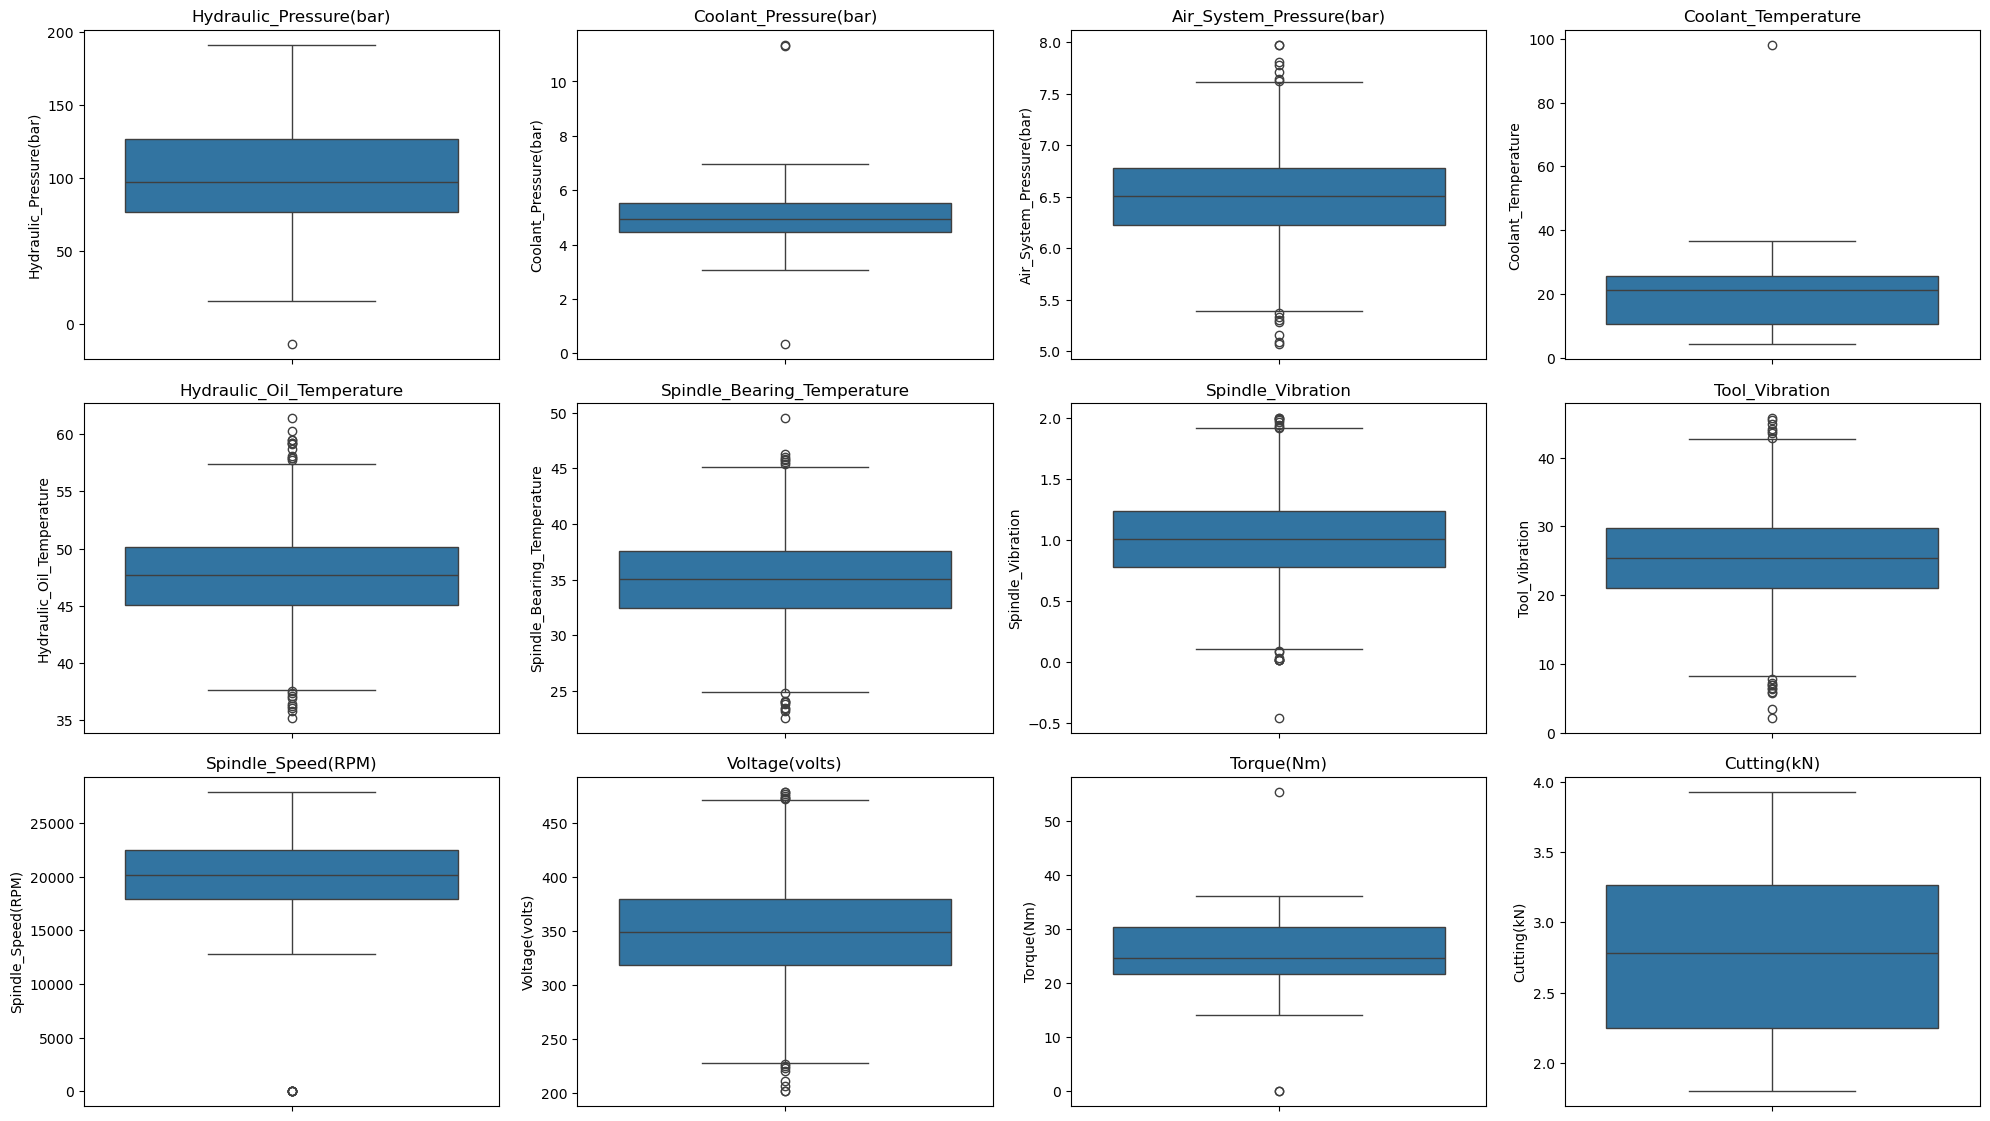

In [68]:
# Menampilkan boxplot kolom numerik DataFrame
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols, start=1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=df, y=col)
    plt.title(col)
plt.tight_layout()
plt.show()

In [69]:
# Menampilkan statistika deskriptif DataFrame
df.describe()

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,101.390501,4.947005,6.499315,18.572560,47.618840,35.063800,1.009328,25.412164,20274.462800,348.996800,25.230035,2.782544
std,30.230060,0.993559,0.405892,8.535867,3.756596,3.759547,0.342143,6.422959,3848.038101,45.321518,6.112952,0.615824
min,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,2.161000,0.000000,202.000000,0.000000,1.800000
25%,76.470719,4.466685,6.220267,10.475000,45.100000,32.500000,0.778750,21.099750,17919.000000,319.000000,21.704037,2.250000
50%,96.763486,4.939960,6.505191,21.200000,47.700000,35.100000,1.008000,25.455000,20137.500000,349.000000,24.647736,2.780000
75%,126.301071,5.512482,6.779330,25.600000,50.100000,37.600000,1.234250,29.766250,22489.750000,380.000000,30.514008,3.262500
max,191.000000,11.350000,7.973992,98.200000,61.400000,49.500000,2.000000,45.726000,27957.000000,479.000000,55.552400,3.930000


Insight:
- Berdasarkan identifikasi outliers pada kolom numerik DataFrame, menunjukkan bahwa terdapat outliers yang masih wajar untuk diidentifikasi sebagai pencatatan nilai pengukuran sesungguhnya yang dilakukan di lapangan. Oleh karena itu, tidak ada penanganan outliers

- Pada kolom ```Hydraulic_Pressure(bar)``` terdapat data yang memiliki outlier dengan nilai negatif. Data nilai negatif tersebut berbeda dengan kolom lainnya yang datanya dalam satuan bar. Namun, nilai tersebut menunjukkan nilai tekanan hidrolik pada saat itu berada di bawah nilai tekanan atmosfer, bukan nilai dari kesalahan penulisan data.
---

### 5.4 Verifikasi Tipe Data

In [70]:
# Merubah tipe data kolom Date menjadi datetime
df["Date"] = pd.to_datetime(df["Date"])

C:\Users\Mahen\AppData\Local\Temp\ipykernel_24324\1259758807.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Date"] = pd.to_datetime(df["Date"])


In [71]:
# Menghapus kolom Data dalam DataFrame
df.drop(columns="Date", inplace=True)

# Menampilkan informasi DataFrame setelah menangani missing value, duplikasi data, dan outliers
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Machine_ID                   2500 non-null   object 
 1   Hydraulic_Pressure(bar)      2500 non-null   float64
 2   Coolant_Pressure(bar)        2500 non-null   float64
 3   Air_System_Pressure(bar)     2500 non-null   float64
 4   Coolant_Temperature          2500 non-null   float64
 5   Hydraulic_Oil_Temperature    2500 non-null   float64
 6   Spindle_Bearing_Temperature  2500 non-null   float64
 7   Spindle_Vibration            2500 non-null   float64
 8   Tool_Vibration               2500 non-null   float64
 9   Spindle_Speed(RPM)           2500 non-null   float64
 10  Voltage(volts)               2500 non-null   float64
 11  Torque(Nm)                   2500 non-null   float64
 12  Cutting(kN)                  2500 non-null   float64
 13  Downtime          

Insight:
- Terjadi perubahan data, yaitu mengisi missing value dengan nilai median masing-masing kolom yang terdapat missing value dan mengubah tipe data kolom ```Date``` menjadi datetime.

- Kolom ```Date``` tidak digunakan sebagai fitur karena solusi permasalahan dalam proyek machine learning ini adalah klasifikasi, bukan time series atau forcasting.

- Dengan demikian, jumlah data dalam DataFrame masih sebesar 2500 data. Kebutuhan fitur untuk melakukan pemodelan machine learning, yaitu jumlah fitur kategorik sebanyak dua fitur dan jumlah fitur numerik sebanyak 12 fitur.
---

### 5.5 Normalisasi pada Fitur-Fitur Numerik

In [72]:
# Menyalin DataFrame untuk normalisasi dan encoding label: df1
df1 = df.copy()

# Membuat MinMaxScaler object: scaler
scaler = MinMaxScaler()

# Normalisasi semua fitur numerik
df1[numerical_feat] = scaler.fit_transform(df1[numerical_feat])

# Menampilkan statistika deskriptif DataFrame setelah normalisasi
df1.describe()

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,0.563575,0.419229,0.493327,0.153800,0.474002,0.463338,0.597452,0.533712,0.725202,0.530674,0.454166,0.461288
std,0.147229,0.090119,0.139457,0.090711,0.143382,0.139760,0.139026,0.147434,0.137641,0.163616,0.110039,0.289119
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.442209,0.375663,0.397451,0.067747,0.377863,0.368030,0.503759,0.434724,0.640949,0.422383,0.390695,0.211268
50%,0.541041,0.418590,0.495346,0.181722,0.477099,0.464684,0.596912,0.534695,0.720303,0.530686,0.443684,0.460094
75%,0.684897,0.470520,0.589536,0.228480,0.568702,0.557621,0.688846,0.633657,0.804441,0.642599,0.549283,0.686620
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Insight:
- Berdasarkan normalisasi fitur-fitur numerik yang dilakukan, menunjukkan pada rentang nilai pada fitur-fitur numerik berubah menjadi rentang nilai antara 0 hingga 1.

- Hal ini dilakukan karena distribusi data fitur-fitur numerik ada yang tidak terdistribusi normal dan memastikan bahwa semua fitur numerik berada dalam rentang yang sama agar dapat meningkatkan performa dalam pemodelan machine learning nantinya.
---

### 5.6 Encoding Label pada Fitur Kategorik

In [73]:
# Membuat LabelEncoder object: encoder
encoder = LabelEncoder()

# Encoding label pada fitur kategori
categorical_feat = df.select_dtypes(include="object").columns.drop(labels="Downtime")
for feature in categorical_feat:
    df1[feature] = encoder.fit_transform(df1[feature])

# Menampilkan statistika deskriptif DataFrame setelah encoding label
df1.describe()

,Machine_ID,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,0.977600,0.563575,0.419229,0.493327,0.153800,0.474002,0.463338,0.597452,0.533712,0.725202,0.530674,0.454166,0.461288
std,0.822538,0.147229,0.090119,0.139457,0.090711,0.143382,0.139760,0.139026,0.147434,0.137641,0.163616,0.110039,0.289119
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.442209,0.375663,0.397451,0.067747,0.377863,0.368030,0.503759,0.434724,0.640949,0.422383,0.390695,0.211268
50%,1.000000,0.541041,0.418590,0.495346,0.181722,0.477099,0.464684,0.596912,0.534695,0.720303,0.530686,0.443684,0.460094
75%,2.000000,0.684897,0.470520,0.589536,0.228480,0.568702,0.557621,0.688846,0.633657,0.804441,0.642599,0.549283,0.686620
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Insight:
- Berdasarkan encoding label yang telah dilakukan, menunjukkan perubahan tipe data fitur kategorik menjadi numerik dengan rentang nilai 0 hingga 2 menyesuaikan interpretasi jumlah kategori yang ada pada fitur kategorik tersebut.

- Hal ini dilakukan karena mempermudah proses pemodelan machine learning terhadap fitur-fitur yang ada, baik terhadap perhitungan statistika maupun memori yang digunakan dikarenakan tidak menambah dimensi fitur kategorik apabila dibandingkan dengan penggunaan one-hot encoding yang akan menambah memori dalam pemrosesan pemodelan machine learning-nya.
---

### 5.7 Splitting Data

In [74]:
# Memisahkan fitur-fitur dengan label: X (fitur) dan y (label)
X = df1.drop(columns="Downtime")
y = df1["Downtime"]

# Menampilkan lima data teratas X dan y
print("Data Fitur-Fitur:")
print(X.head())
print("\nData Label:")
print(y.head())

Data Fitur-Fitur:
   Machine_ID  Hydraulic_Pressure(bar)  Coolant_Pressure(bar)  \
0           0                 0.415760               0.599431   
1           0                 0.680168               0.418312   
2           2                 0.416149               0.590876   
3           1                 0.748401               0.385431   
4           0                 0.364475               0.595753   

   Air_System_Pressure(bar)  Coolant_Temperature  Hydraulic_Oil_Temperature  \
0                  0.419680             0.228480                   0.412214   
1                  0.389365             0.331562                   0.465649   
2                  0.546972             0.095643                   0.209924   
3                  0.514313             0.215728                   0.343511   
4                  0.370298             0.000000                   0.461832   

   Spindle_Bearing_Temperature  Spindle_Vibration  Tool_Vibration  \
0                     0.401487           0.7119

In [75]:
# Splitting data menjadi train set dan test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Menampilkan shape masing-masing train set dan test set
print("Train Set Shape:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print("\nTest Set Shape:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")


Train Set Shape:
X_train: (2000, 13)
y_train: (2000,)

Test Set Shape:
X_test: (500, 13)
y_test: (500,)


Insight:
- Berdasarkan data splitting yang dilakukan, menunjukkan bahwa komposisi train set sebesar 80% dengan jumlah data sebanyak 2000 data dan test set sebesar 20% dengan jumlah data sebanyak 500 data.

- Hal tersebut dilakukan karena membantu menggeneralisasi pemodelan machine learning yang akan digunakan dan memungkinkan melakukan proses pemodelan machine learning secara adil terhadap bagian-bagian data, sehingga model yang dihasilkan tidak bias kepada satu hingga beberapa bagian data saja.
---

## 7. Model Training

### 7.1 Random Forest

In [76]:
# Membuat RandomForestClassifier object: rf
rf = RandomForestClassifier(random_state=42)

# Membuat waktu mulai training model Random Forest: start_time_rf
start_time_rf = time.time()

# Training model Random Forest
rf.fit(X_train, y_train)

# Membuat waktu training model Random Forest: train_time_rf
train_time_rf = time.time() - start_time_rf

# Menampilkan training model Random Forest selesai dan waktunya
print("Training Model Random Forest Telah Selesai!")
print(f"Waktu yang diperlukan: {train_time_rf:.4f}")

Training Model Random Forest Telah Selesai!
Waktu yang diperlukan: 0.4293


Insight:
- Berdasarkan model training yang dilakukan, training model kali ini menggunakan algoritma Random Forest. Random Forest merupakan algoritma yang menggunakan metode ensembel, menggabungkan model-model individual menjadi model akhir yang digabungkan. 

- Pada dasarnya Random Forest menggunakan teknik pendekatan bagging, penggunaan parameter, seperti ```random_state``` memungkinkan melatih model akhir dari melatih beberapa sampel model secara acak, independen, dan paralel. Secara default, parameter lain yang perlu diperhatikan, seperti ```n_estimators``` dengan nilai 100, artinya memiliki sampel model berjumlah 100 yang dilatih untuk digabungkan menjadi model akhir.

- Kelebihan menggunakan algoritma Random Forest adalah mengurangi resiko overfitting pada model yang dihasilkan. Hal tersebut dapat terjadi karena algoritma Random Forest melatih sampel model secara acak dan paralel, sehingga tidak mampu menangkap data latih lebih mendalam, yang bisa memungkinkan akurasi model terhadap data latih tinggi, namun akurasi prediksi model terhadap data tes akan lebih rendah dibandingkan terhadap data latihnya.

- Namun, waktu yang diperlukan untuk melatih model lebih lambat karena jumlah sampel model yang ditentukan besar dan jumlah data latih yang digunakan tegolong banyak.

- Pada model training menggunakan Random Forest kali ini, memerlukan waktu pelatihan selama 0.4 detik.
---

### 7.2 Light Gradient Boosting Machine (LGBM)

In [77]:
# Membuat LGBMClassifier object: lgbm
lgbm = LGBMClassifier(random_state=42)

# Membuat waktu mulai training model LGBM: start_time_lgbm
start_time_lgbm = time.time()

# Training model LGBM
lgbm.fit(X_train, y_train)

# Membuat waktu training model LGBM: train_time_lgbm
train_time_lgbm = time.time() - start_time_lgbm

# Menampilkan training model LGBM selesai dan waktunya
print("Training Model LGBM Telah Selesai!")
print(f"Waktu yang diperlukan: {train_time_lgbm:.4f}")

[LightGBM] [Info] Number of positive: 966, number of negative: 1034
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000279 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2685
[LightGBM] [Info] Number of data points in the train set: 2000, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.483000 -> initscore=-0.068026
[LightGBM] [Info] Start training from score -0.068026
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training Model LGBM Telah Selesai!
Waktu yang diperlukan: 0.1511


Insight:
- Berdasarkan model training yang dilakukan kali ini, training model menggunakan LGBM. Seperti Random Forest, LGBM juga merupakan algoritma yang menggunakan metode ensembel.

- Namun, berbeda dengan Random Forest, LGBM ini menggunakan teknik pendekatan boosting. Penggunaan parameter, seperti ```random_state``` memungkinkan melatih model akhir dari melatih beberapa sampel model secara acak, dependen, dan bertahap. Pelatihan secara bertahap berarti memungkinkan sampel model berikutnya mencoba untuk memperbaiki kesalahan sampel model sebelumnya. Parameter lainnya yang perlu diperhatikan secara default, seperti ```max_depth``` bernilai -1 yang berarti tidak ada batas untuk melatih model hingga memiliki kompleksitas tinggi. Berbeda dengan Random Forest yang mana parameter ```max_depth``` secara default diatur tidak ada.

- Kelebihan menggunakan algoritma LGBM adalah waktu yang diperlukan untuk melatih model lebih cepat karena algoritma ini dikembangkan untuk meringankan penggunaan ruang dan memori, sehingga algoritma ini dapat menangani data yang besar yang mana berdampak pada penggunaan memori yang banyak dan kecepatan yang semakin melambat.

- Namun, kekurangan dari menggunakan algoritma LGBM adalah lebih rentan terhadap overfitting karena pengaturan parameter ```max_depth``` yang memungkinkan melatih model lebih mendalam lagi yang bisa menangkap data latih noise, seperti outliers. 
---

## 8. Best Model Selection

- Pada proyek ini menggunakan dataset yang terdapat outliers karena pengambilan data langsung pengamatan membaca nilai pengukuran di lapangan, tidak ada rekayasa data apapun yang terjadi. Oleh karena itu, kekurangan yang dimiliki oleh LGBM mengenai rentan terhadap overfitting, tidak dipermasalahan dalam proyek ini.

- Dengan demikian, algoritma LGBM menjadi penggunaan algoritma dalam model dengan solusi terbaik untuk proyek ini dikarenakan kelebihannya waktu yang dibutuhkan dalam pelatihan model yang lebih cepat dibandingkan dengan algoritma Random Forest dan kekurangan LGBM yang tidak perlu diatasi lebih lanjut, dibandingkan kekurangan Random Forest yang mana sudah teratasi dengan menggunakan algoritma LGBM.

## 9. Model Evaluation

### 9.1 Best Model Evaluation

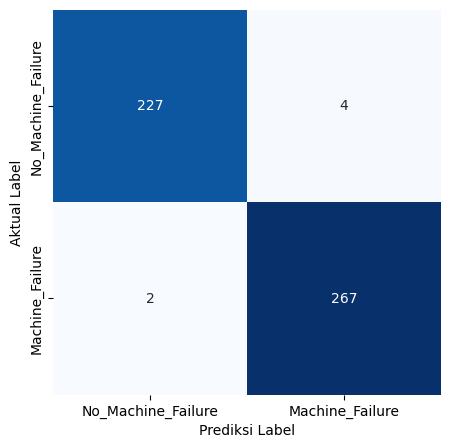

Laporan Klasifikasi Model rf:
                    precision    recall  f1-score   support

   Machine_Failure       0.99      0.98      0.99       231
No_Machine_Failure       0.99      0.99      0.99       269

          accuracy                           0.99       500
         macro avg       0.99      0.99      0.99       500
      weighted avg       0.99      0.99      0.99       500



In [78]:
# Prediksi model Random Forest
y_pred_rf = rf.predict(X_test)

# Evaluasi model rf
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Menampilkan confusion matrix model Random Forest
plt.figure(figsize=(5, 5))
sns.heatmap(
    data=conf_matrix_rf,
    annot=True,
    cmap="Blues",
    cbar=False,
    fmt="d",
    xticklabels=["No_Machine_Failure", "Machine_Failure"],
    yticklabels=["No_Machine_Failure", "Machine_Failure"],
)
plt.xlabel("Prediksi Label")
plt.ylabel("Aktual Label")
plt.show()

# Menampilkan classification report model Random Forest
print("Laporan Klasifikasi Model rf:")
print(class_report_rf)

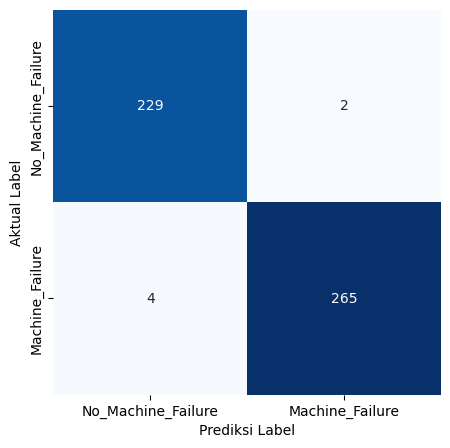

Laporan Klasifikasi Model LGBM:
                    precision    recall  f1-score   support

   Machine_Failure       0.98      0.99      0.99       231
No_Machine_Failure       0.99      0.99      0.99       269

          accuracy                           0.99       500
         macro avg       0.99      0.99      0.99       500
      weighted avg       0.99      0.99      0.99       500



In [79]:
# Prediksi model LGBM
y_pred_lgbm = lgbm.predict(X_test)

# Evaluasi model LGBM
conf_matrix_lgbm = confusion_matrix(y_test, y_pred_lgbm)
class_report_lgbm = classification_report(y_test, y_pred_lgbm)

# Menampilkan confusion matrix model LGBM
plt.figure(figsize=(5, 5))
sns.heatmap(
    data=conf_matrix_lgbm,
    annot=True,
    cmap="Blues",
    cbar=False,
    fmt="d",
    xticklabels=["No_Machine_Failure", "Machine_Failure"],
    yticklabels=["No_Machine_Failure", "Machine_Failure"],
)
plt.xlabel("Prediksi Label")
plt.ylabel("Aktual Label")
plt.show()

# Menampilkan classification report model LGBM
print("Laporan Klasifikasi Model LGBM:")
print(class_report_lgbm)

Insight: 
-  Berdasarkan evaluasi model menggunakan algoritma Random Forest dan LGBM, menunjukkan perbedaan skor yang didapatkan untuk label ```"Machine_Failure"```, yaitu pada Random Forest mendapatkan skor presisi 0.99 dan skor recall 0.98, sedangkan pada LGBM mendapatkan skor presisi 0.98 dan skor recall 0.99. Untuk menjelaskan lebih dalam mengenai pemilihan model menggunakan algoritma LGBM sebagai solusi terbaik, dengan pertimbangan mencari seberapa baik model menghindari hasil prediksi label No_Machine_Failure terhadap aktual label Machine_Failure adalah algoritma LGBM dikarenakan skor recall yang menjadi pertimbangan tersebut lebih tinggi dibandingkan dengan algoritma Random Forest.

- Berdasarkan evaluasi model menggunakan algoritma LGBM, menunjukkan bahwa metrik yang digunakan untuk evaluasi pemodelan machine learning klasifikasi adalah confusion metric dan classification report. Confussion matrix digunakan untuk memetakan jumlah data yang berhasil diprediksi labelnya berdasarkan aktual labelnya. Sedangkan, classification report digunakan untuk melihat seberapa persen akurasi, presisi, recall, dan f1-score yang didapatkan oleh model pada masing-masing label. Evaluasi model dilakukan untuk menggeneralisasi prediksi model pada semua mesin.

- Akurasi yang didapatkan sebesar 0.99 atau 99%. Akurasi ini mengukur kinerja model dengan menghitung proporsi dari prediksi, baik positif maupun negatif yang benar. Pada confussion matrix menunjukkan jumlah data dalam test set yang berhasil secara akurat dalam prediksi model sebanyak 494 data.

- Presisi yang didapatkan pada label Machine_Failure adalah 0.98 atau 98%, sedangkan pada label No_Machine_Failure adalah 0.99 atau 99%. Presisi ini mengukur seberapa baik model menghindari hasil prediksi label No_Machine_Failure terhadap aktual label Machine_Failure. Pada confussion matrix menunjukkan jumlah data dalam test set yang masih menghasilkan prediksi label No_Machine_Failure terhadap aktual label Machine_Failure sebanyak 4 data.

- Recall/Sensitivitas yang didapatkan pada label Machine_Failure adalah 0.99 atau 99%, sedangkan pada label No_Machine_Failure adalah 0.99 atau 99%. Sensitivitas ini mengukur seberapa baik model dapat menangkap semua prediksi positif atau berlabel Machine_Failure. Pada confussion matrix menunjukkan jumlah data dalam test set yang masih menghasilkan prediksi label Machine_Failure terhadap aktual label No_Machine_Failure sebanyak 2 data.

- F1-Score yang didapatkan pada label Machine_Failure adalah 0.99 atau 99%, sedangkan pada label No_Machine_Failure adalah 0.99 atau 99%. F1-Score ini merupakan metrik yang menggabungkan presisi dan recall menjadi satu metrik tunggal yang mempertimbangkan gabungan metrik keduanya. Pada confussion matrix menunjukkan jumlah data dalam test set yang masih menghasilkan prediksi label No_Machine_Failure terhadap aktual label Machine_Failure sebanyak 4 data, sedangkan jumlah data dalam test set yang masih menghasilkan prediksi label Machine_Failure terhadap aktual label No_Machine_Failure sebanyak 2 data.

- Dengan demikian, hasil prediksi model menggunakan LGBM pada test set untuk menggeneralisasi prediksi model pada semua mesin dengan nama brand sama, berdasarkan hasil F1-Score sebesar 0.99 atau 99%, baik untuk label Machine_Failure maupun label No_Machine_Failure.
---

### 9.2 Prediksi Best Model pada Masing-Masing Mesin

In [80]:
# Menampilkan lima data teratas Dataframe sebelum normalisasi dan encoding label
df.head()

,Machine_ID,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,Makino-L1-Unit1-2013,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,Makino-L1-Unit1-2013,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,Makino-L3-Unit1-2015,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,Makino-L2-Unit1-2015,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,Makino-L1-Unit1-2013,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [81]:
# Menampilkan lima data teratas DataFrame setelah normalisasi dan encoding label
df1.head()

,Machine_ID,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,0,0.415760,0.599431,0.419680,0.228480,0.412214,0.401487,0.711906,0.558499,0.926137,0.480144,0.433020,0.835681,Machine_Failure
1,0,0.680168,0.418312,0.389365,0.331562,0.465649,0.446097,0.748883,0.530541,0.710234,0.599278,0.255667,0.413146,Machine_Failure
2,2,0.416149,0.590876,0.546972,0.095643,0.209924,0.386617,0.723283,0.652978,0.710055,0.444043,0.432911,0.821596,Machine_Failure
3,1,0.748401,0.385431,0.514313,0.215728,0.343511,0.669145,0.438440,0.657179,0.660336,0.570397,0.465507,0.821596,Machine_Failure
4,0,0.364475,0.595753,0.370298,0.000000,0.461832,0.327138,0.586753,0.536095,0.948814,0.548736,0.459312,0.821596,Machine_Failure


In [82]:
# Mengelompokkan fitur test set berdasarkan Machine_ID: X_test_0, X_test_1, X_test_2
X_test_0 = X_test.loc[X_test["Machine_ID"] == 0, :]
X_test_1 = X_test.loc[X_test["Machine_ID"] == 1, :]
X_test_2 = X_test.loc[X_test["Machine_ID"] == 2, :]

# Menampilkan lima data teratas masing-masing fitur test set berdasarkan Machine_ID
print("===========================================")
print("Fitur Test Set untuk Makino-L1-Unit1-2013")
print("===========================================")
print(X_test_0.head(), "\n")
print("===========================================")
print("Fitur Test Set untuk Makino-L2-Unit1-2015")
print("===========================================")
print(X_test_1.head(), "\n")
print("===========================================")
print("Fitur Test Set untuk Makino-L3-Unit1-2015")
print("===========================================")
print(X_test_2.head())

Fitur Test Set untuk Makino-L1-Unit1-2013
      Machine_ID  Hydraulic_Pressure(bar)  Coolant_Pressure(bar)  \
1447           0                 0.505464               0.460705   
1114           0                 0.769039               0.313841   
1537           0                 0.529773               0.369149   
668            0                 0.528994               0.601872   
1583           0                 0.519786               0.257579   

      Air_System_Pressure(bar)  Coolant_Temperature  \
1447                  0.609071             0.086079   
1114                  0.245773             0.086079   
1537                  0.366800             0.019129   
668                   0.505708             0.073326   
1583                  0.422799             0.017003   

      Hydraulic_Oil_Temperature  Spindle_Bearing_Temperature  \
1447                   0.339695                     0.568773   
1114                   0.645038                     0.724907   
1537                   0.6

In [83]:
def y_test_machine(y_test, X_test_machine):
    """
    Pengelompokkan label test set berdasarkan Machine_ID

    Args:
        y_test (Series): label test set
        X_test_machine (DataFrame): masing-masing fitur test set berdasarkan Machine_ID

    Return:
        y_test_machine (Series): masing-masing label test set berdasarkan Machine_ID

    """
    y_test_machine = pd.Series()
    for key in y_test.keys():
        for index in X_test_machine.index:
            if key == index:
                y_test_machine[key] = y_test[key]
            else:
                pass
    return y_test_machine


# Mengelompokkan label test set berdasarkan Machine_ID: y_test_0, y_test_1, y_test_2
y_test_0 = y_test_machine(y_test, X_test_0)
y_test_1 = y_test_machine(y_test, X_test_1)
y_test_2 = y_test_machine(y_test, X_test_2)

# Menampilkan lima data teratas masing-masing label test set berdasarkan Machine_ID
print("===========================================")
print("Label Test Set untuk Makino-L1-Unit1-2013")
print("===========================================")
print(y_test_0.head(), "\n")
print("===========================================")
print("Label Test Set untuk Makino-L2-Unit1-2015")
print("===========================================")
print(y_test_1.head(), "\n")
print("===========================================")
print("Label Test Set untuk Makino-L3-Unit1-2015")
print("===========================================")
print(y_test_2.head())

Label Test Set untuk Makino-L1-Unit1-2013
1447    No_Machine_Failure
1114    No_Machine_Failure
1537       Machine_Failure
668        Machine_Failure
1583    No_Machine_Failure
dtype: object 

Label Test Set untuk Makino-L2-Unit1-2015
1064    No_Machine_Failure
923     No_Machine_Failure
670        Machine_Failure
1414       Machine_Failure
1103    No_Machine_Failure
dtype: object 

Label Test Set untuk Makino-L3-Unit1-2015
2287       Machine_Failure
497        Machine_Failure
246        Machine_Failure
2011    No_Machine_Failure
1034    No_Machine_Failure
dtype: object


In [84]:
# Prediksi salah satu data fitur test set untuk Makino-L1-Unit1-2013
# Memilih data menjadi sampel fitur test set: X_test_0_sample
X_test_0_sample = X_test_0[:1].copy()
# Membuat dictionary untuk hasil prediksi
y_pred_0_sample = {"y_test_0": y_test_0[:1]}
# Prediksi sampel fitur test set
y_pred_0_sample["lgbm_pred_0"] = lgbm.predict(X_test_0_sample)
# Menampilkan perbandingan sampel label prediksi dengan label test set untuk Makino-L1-Unit1-2013
print("Perbandingan Sampel Label Prediksi dengan Label Test Set (Makino-L1-Unit1-2013)")
pd.DataFrame(y_pred_0_sample)

Perbandingan Sampel Label Prediksi dengan Label Test Set (Makino-L1-Unit1-2013)


,y_test_0,lgbm_pred_0
1447,No_Machine_Failure,No_Machine_Failure


In [85]:
# Prediksi salah satu data fitur test set untuk Makino-L2-Unit1-2015
# Memilih data menjadi sampel fitur test set: X_test_0_sample
X_test_1_sample = X_test_1[:1].copy()
# Membuat dictionary untuk hasil prediksi
y_pred_1_sample = {"y_test_1": y_test_1[:1]}
# Prediksi sampel fitur test set
y_pred_1_sample["lgbm_pred_1"] = lgbm.predict(X_test_1_sample)
# Menampilkan perbandingan sampel label prediksi dengan label test set untuk Makino-L2-Unit1-2015
print("Perbandingan Sampel Label Prediksi dengan Label Test Set (Makino-L2-Unit1-2015)")
pd.DataFrame(y_pred_1_sample)

Perbandingan Sampel Label Prediksi dengan Label Test Set (Makino-L2-Unit1-2015)


,y_test_1,lgbm_pred_1
1064,No_Machine_Failure,No_Machine_Failure


In [86]:
# Prediksi salah satu data fitur test set untuk Makino-L2-Unit1-2015
# Memilih data menjadi sampel fitur test set: X_test_0_sample
X_test_2_sample = X_test_2[:1].copy()
# Membuat dictionary untuk hasil prediksi
y_pred_2_sample = {"y_test_2": y_test_2[:1]}
# Prediksi sampel fitur test set
y_pred_2_sample["lgbm_pred_2"] = lgbm.predict(X_test_2_sample)
# Menampilkan perbandingan sampel label prediksi dengan label test set untuk Makino-L2-Unit1-2015
print("Perbandingan Sampel Label Prediksi dengan Label Test Set (Makino-L2-Unit1-2015)")
pd.DataFrame(y_pred_2_sample)

Perbandingan Sampel Label Prediksi dengan Label Test Set (Makino-L2-Unit1-2015)


,y_test_2,lgbm_pred_2
2287,Machine_Failure,Machine_Failure


Insight:
- Berdasarkan hasil perdiksi model pada masing-masing sampel mesin, menunjukkan hasil prediksi sesuai dengan sampel label test set.

- Untuk prediksi sampel data fitur mesin Makino-L1-Unit1-2013 menunjukkan hasil prediksi No_Machine_Failure yang mana sesuai label sampel data fitur yang digunakan, yaitu No_Machine_Failure.

- Untuk prediksi sampel data fitur mesin Makino-L2-Unit1-2015 menunjukkan hasil prediksi No_Machine_Failure yang mana sesuai label sampel data fitur yang digunakan, yaitu No_Machine_Failure.

- Untuk prediksi sampel data fitur mesin Makino-L3-Unit1-2015 menunjukkan hasil prediksi Machine_Failure yang mana sesuai label sampel data fitur yang digunakan, yaitu Machine_Failure.

- Berdasarkan uraian hasil prediksi pada masing-masing mesin, proyek ini dapat dijadikan sebagai solusi untuk memprediksi kegagalan setiap mesin dengan brand yang sama.
---